In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import concat
import pandas_datareader as data


In [2]:
#creating a start date and end date
start = '2010-01-01'
#end =  datetime.today().strftime("%Y-%m-%d")
end = '2019-12-31'

#creating the dataframe
df= data.DataReader('AAPL', 'yahoo', start, end)

#getting the first 5 rows and the last 5 rows
print(df.head(5))
print(df.tail(5))

df.shape

                High       Low      Open     Close       Volume  Adj Close
Date                                                                      
2010-01-04  7.660714  7.585000  7.622500  7.643214  493729600.0   6.515213
2010-01-05  7.699643  7.616071  7.664286  7.656429  601904800.0   6.526477
2010-01-06  7.686786  7.526786  7.656429  7.534643  552160000.0   6.422664
2010-01-07  7.571429  7.466071  7.562500  7.520714  477131200.0   6.410792
2010-01-08  7.571429  7.466429  7.510714  7.570714  447610800.0   6.453411
                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2019-12-24  71.222504  70.730003  71.172501  71.067497   48478800.0  69.623238
2019-12-26  72.495003  71.175003  71.205002  72.477501   93121200.0  71.004578
2019-12-27  73.492500  72.029999  72.779999  72.449997  146266000.0  70.977623
2019-12-30  73.172501  71.305000  72.364998  72.879997  144114400.0  71.398895
2

(2516, 6)

In [2]:
#dropping the adj close column as it is not needed since it similar to the close column and also the date column
df = df.reset_index()
df.head()

NameError: name 'df' is not defined

In [57]:
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0


In [58]:
#checking if there are any missing datas
missing_data = df[df.isna().any(axis=1)]
print(missing_data)
df.info()
print(df.shape)

Empty DataFrame
Columns: [High, Low, Open, Close, Volume]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    2516 non-null   float64
 1   Low     2516 non-null   float64
 2   Open    2516 non-null   float64
 3   Close   2516 non-null   float64
 4   Volume  2516 non-null   float64
dtypes: float64(5)
memory usage: 98.4 KB
(2516, 5)


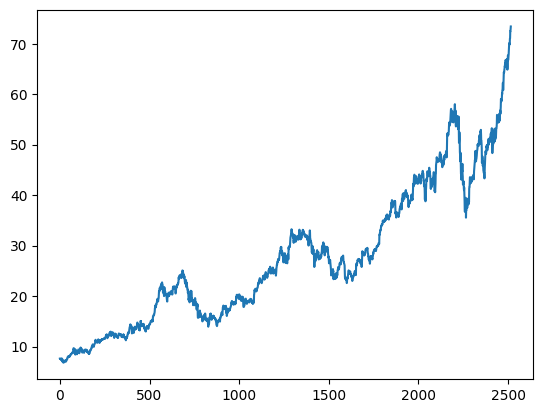

In [59]:
#since close column is our target variable, plot the close column
plt.plot(df.Close)

In [60]:
#splitting the data into training and testing
train_header = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
target_header = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(df.shape)
print(train_header.shape)
print(target_header.shape)

(2516, 5)
(1761, 1)
(755, 1)


In [61]:
#Scaling the stock data
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
scaler = MinMaxScaler(feature_range=(0,1))
train_header_array = scaler.fit_transform(train_header)

train_header_array


#print("\n Scaled data: \n ", train_header_array)

array([[0. ],
       [0. ],
       [0. ],
       ...,
       [0.9],
       [0.8],
       [0.8]])

In [65]:
#creating the number of steps(x) so as to predict the next result(y)
#the closing price of the particular day would depend on the previous days
x_train = []
y_train = []

for i in range(100, train_header_array.shape[0]):
    x_train.append(train_header_array[i-100: i])
    y_train.append(train_header_array[i, 0]) #because we are considering only one column
x_train, y_train = np.array(x_train), np.array(y_train)

In [75]:
#ml model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
import tensorflow

model = Sequential()
model.add(LSTM(units =50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units =60, activation = 'relu', return_sequences = True,))
model.add(Dropout(0.3))
model.add(LSTM(units =80, activation = 'relu', return_sequences = True, ))
model.add(Dropout(0.4))
model.add(LSTM(units =120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_8 (LSTM)               (None, 120)              

In [76]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 12s 151ms/step - loss: 0.0764
Epoch 2/50
52/52 [==============================] - 7s 140ms/step - loss: 0.0159
Epoch 3/50
52/52 [==============================] - 7s 139ms/step - loss: 0.0122
Epoch 4/50
52/52 [==============================] - 7s 137ms/step - loss: 0.0110
Epoch 5/50
52/52 [==============================] - 7s 139ms/step - loss: 0.0104
Epoch 6/50
52/52 [==============================] - 7s 139ms/step - loss: 0.0098
Epoch 7/50
52/52 [==============================] - 7s 139ms/step - loss: 0.0094
Epoch 8/50
52/52 [==============================] - 7s 144ms/step - loss: 0.0094
Epoch 9/50
52/52 [==============================] - 7s 140ms/step - loss: 0.0082
Epoch 10/50
52/52 [==============================] - 7s 141ms/step - loss: 0.0078
Epoch 11/50
52/52 [==============================] - 7s 142ms/step - loss: 0.0077
Epoch 12/50
52/52 [==============================] - 7s 140ms/step - loss: 0.0081
Epoch 13/50
52/52 [=====

In [81]:
#save the model
model.save('venv\lstm_model.h5')

In [92]:
#to predict the values for testing data, the previous 100 days is needed
prev_100_days = train_header.tail(100)
final_df = prev_100_days.append(target_header, ignore_index=True)
final_df.head()

C:\Users\dagbo\AppData\Local\Temp\ipykernel_30472\1137634701.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = prev_100_days.append(target_header, ignore_index=True)


,Close
0,27.202499
1,27.000000
2,26.982500
3,27.045000
4,27.370001


In [94]:
scaled_data = scaler.fit_transform(final_df)
scaled_data
scaled_data.shape

(855, 1)

In [96]:
x_test = []
y_test = []

for i in range(100, scaled_data.shape[0]):
    x_test.append(scaled_data[i-100: i])
    y_test.append(scaled_data[i, 0])
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [97]:
#making predictions
y_pred = model.predict(x_test)
y_pred.shape

24/24 [==============================] - 2s 46ms/step


(755, 1)

In [99]:
print(y_test)
print('----------------predictions--------------')
print(y_pred)


[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.2 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.3 0.2 0.2 0.3 0.3 0.3 0.2
 0.2 0.2 0.2 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.2 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.4 0.3 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.3 0.4 0.4 0.3
 0.3 0.3 0.3 0.3 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.

In [103]:
scaler.scale_


array([0.])

In [104]:
factorized_scale = 1/0.020995
y_pred = y_pred*factorized_scale
y_test = y_test * factorized_scale

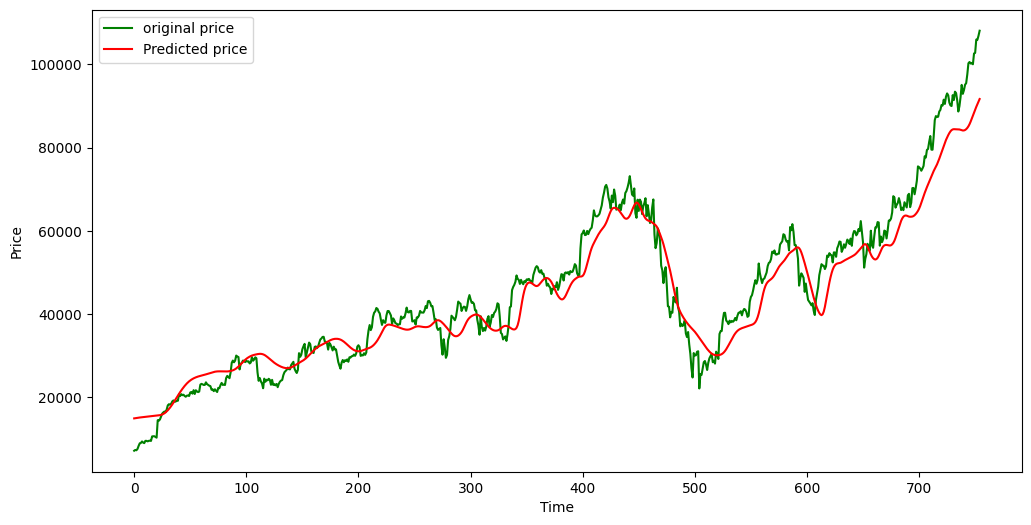

In [106]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'g', label = "original price")
plt.plot(y_pred, 'r', label = "Predicted price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()